# Exploratory Data Analysis

## What are the main characteristics that have the most impact on car price?

## 1. Import Data

### Import libraries

In [1]:
# %pip install scipy

In [2]:
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

### Reading the dataset from the URL

<p>The functions below will download the dataset onto your computer.</p>

In [3]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

<p>To obtain the dataset, utilize the <code>download_file()</code> function as defined above:</p>

In [4]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [5]:
filename = download_file(data_url)

Downloading: 100.00% (35648 / 35648 bytes)
Download Complete.


<p>Load the data and store it in dataframe <code>df</code>:</p>

In [6]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 2. Analyzing Individual Feature Patterns Using Visualization

<p><b>How to choose the right visualization method?</b></p>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>

In [7]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

### Question 1

<p><b>Question 1.1</b> What is the data type of the column <code>peak-rpm</code>?</p>

In [8]:
df.dtypes["peak-rpm"]

dtype('float64')

<p>For example, we can calculate the correlation between variables  of type <code>int64</code> or <code>float64</code> using the method <code>corr()</code>:</p>
<pre>dataframe.corr()</pre>

<p>The diagonal elements are always one. We will study correlation more precisely Pearson correlation in-depth at the end of the notebook.</p>

### Question 1

<p><b>Question 1.2</b> Find the correlation between the following columns: <code>bore</code>, <code>stroke</code>, <code>compression-ratio</code>, and <code>horsepower</code>.</p>
<p>Hint: if you would like to select those columns, use the following syntax:</p>
<pre>df[["bore", "stroke", "compression-ratio", "horsepower"]]</pre>

In [9]:
df[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Continuous Numerical Variables

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type <code>int64</code> or <code>float64</code>. A great way to visualize these variables is by using scatterplots with fitted lines.</p>
<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use <code>regplot()</code> which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>

<p>Let's see several examples of different linear relationships:</p>

#### Positive Linear Relationship

<p>Let's find the scatterplot of <code>engine-size</code> and <code>price</code>.</p>

(0.0, 53144.444780956495)

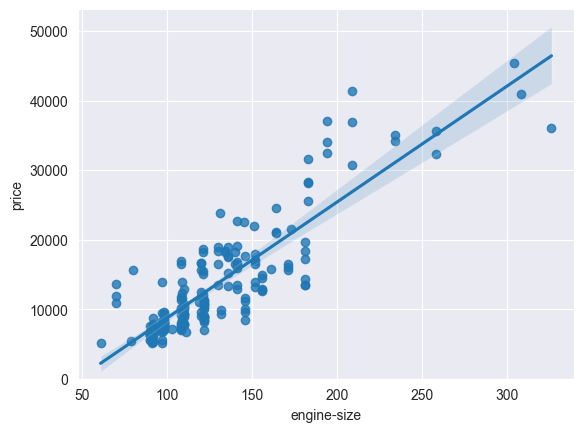

In [10]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(bottom=0)

<p>As the <code>engine-size</code> goes up, the <code>price</code> goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

<p>We can examine the correlation between <code>engine-size</code> and <code>price</code> and see that it's approximately 0.87.</p>

In [11]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<p>Highway mpg is a potential predictor variable of price. Let's find the scatterplot of <code>highway-mpg</code> and <code>price</code>.</p>

<Axes: xlabel='highway-mpg', ylabel='price'>

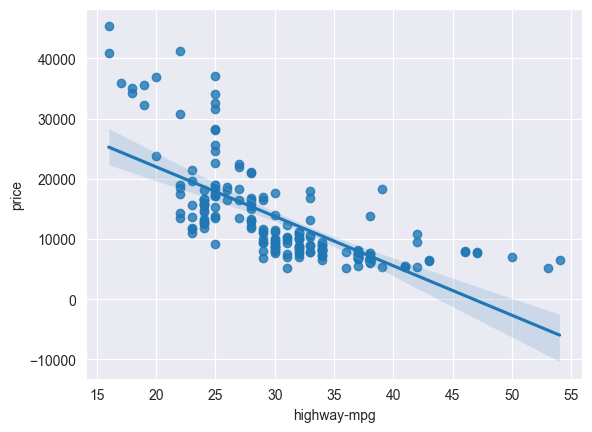

In [12]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>As <code>highway-mpg</code> goes up, the <code>price</code> goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

We can examine the correlation between <code>highway-mpg</code> and <code>price</code> and see it's approximately -0.704.

In [13]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### Weak Linear Relationship

<p>Let's see if <code>peak-rpm</code> is a predictor variable of <code>price</code>.</p>

<Axes: xlabel='peak-rpm', ylabel='price'>

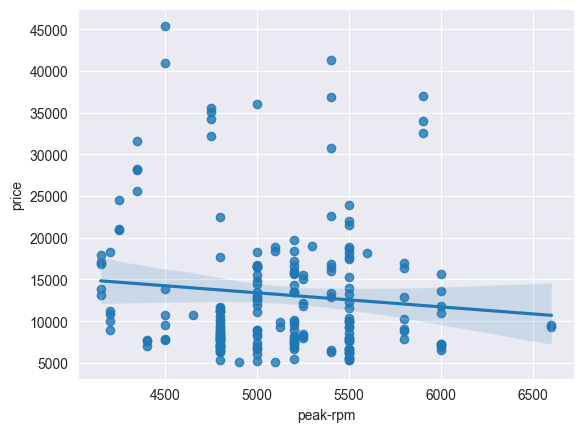

In [14]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

<p>We can examine the correlation between <code>peak-rpm</code> and <code>price</code> and see it's approximately -0.101616.</p>

In [15]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### Question 2

<p><b>Question 2.1</b> Find the correlation between <code>x="stroke"</code> and <code>y="price"</code>.</p>
<p>Hint: if you would like to select those columns, use the following syntax:</p>
 <pre>df[["stroke", "price"]]</pre>

In [16]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<p><b>Question 2.2</b> Given the correlation results between <code>price</code> and <code>stroke</code>, do you expect a linear relationship?</p>
<p>Verify your results using the function <code>regplot()</code>.</p>

<Axes: xlabel='stroke', ylabel='price'>

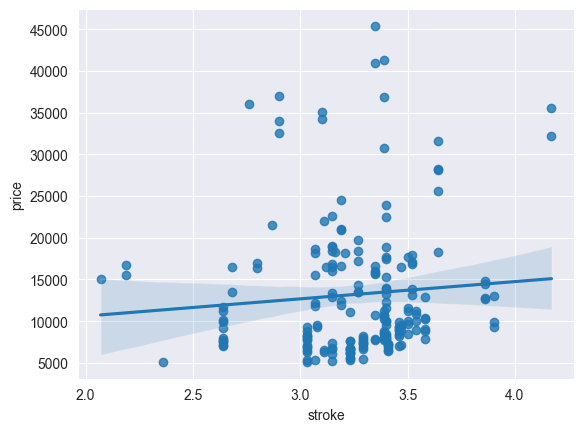

In [17]:
sns.regplot(x="stroke", y="price", data=df)

### Categorical Variables

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type <code>object</code> or <code>int64</code>. A good way to visualize categorical variables is by using boxplots.</p>

<p>Let's look at the relationship between <code>body-style</code> and <code>price</code>.</p>

<Axes: xlabel='body-style', ylabel='price'>

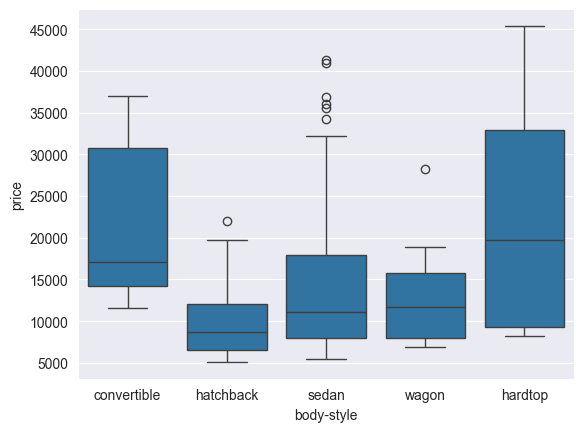

In [18]:
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine <code>engine-location</code> and <code>price</code>:</p>

<Axes: xlabel='engine-location', ylabel='price'>

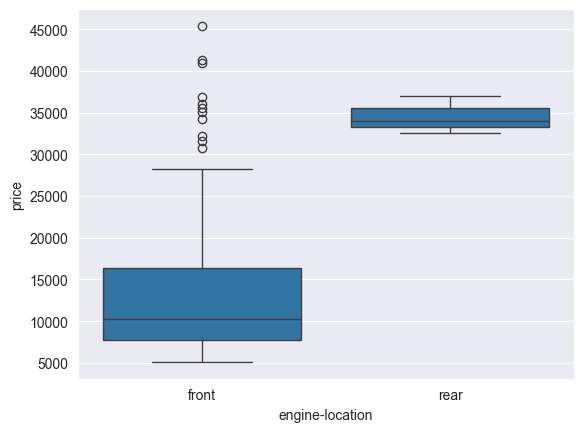

In [19]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two <code>engine-location</code> categories, front and rear, are distinct enough to take <code>engine-location</code> as a potential good predictor of price.</p>

<p>Let's examine <code>drive-wheels</code> and <code>price</code>.</p>

<Axes: xlabel='drive-wheels', ylabel='price'>

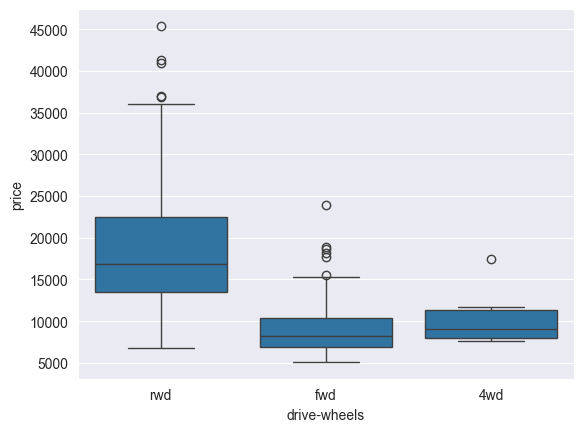

In [20]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different <code>drive-wheels</code> categories differs. As such, <code>drive-wheels</code> could potentially be a predictor of price.</p>

## 3. Descriptive Statistical Analysis

<p>Let's first take a look at the variables by utilizing a description method.</p>
<p>The <code>describe()</code> function automatically computes basic statistics for all continuous variables. Any <b>NaN</b> values are automatically skipped in these statistics.</p>
<p>This will show:</p>
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li>
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

<p>We can apply the method <code>describe()</code> as follows:</p>

In [21]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<p>The default setting of <code>describe</code> skips variables of type object. We can apply the method <code>describe()</code> on the variables of type <code>object</code> as follows:

In [22]:
df.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts

<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the <code>value_counts()</code> method on the column <code>drive-wheels</code>. Don't forget the method <code>value_counts()</code> only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df["drive-wheels"]</code>, not two brackets <code>df[["drive-wheels"]]</code>.</p>

In [23]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

<p>We can convert the series to a dataframe as follows:</p>

In [24]:
df["drive-wheels"].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


<p>Let's repeat the above steps but save the results to the dataframe <code>drive_wheels_counts</code> and rename the column <code>drive-wheels</code> to <code>value_counts</code>.</p>

In [25]:
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts = drive_wheels_counts.rename(columns={"drive-wheels": "value_counts"})
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


<p>Now let's rename the index to <code>drive-wheels</code>:</p>

In [26]:
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


<p>We can repeat the above process for the variable <code>engine-location</code>.</p>

In [27]:
engine_loc_counts = df["engine-location"].value_counts().to_frame()
engine_loc_counts = engine_loc_counts.rename(columns={"engine-location": "value_counts"})
engine_loc_counts.index.name = "engine-location"
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

## 4. Basics of Grouping

<p>The <code>groupby()</code> method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups. For example, let's group by the variable <code>drive-wheels</code>. We see that there are 3 different categories of drive wheels.</p>

In [28]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group <code>drive-wheels</code> and then average them. We can select the column <code>drive-wheels</code>, <code>body-style</code>, <code>price</code>, then assign it to the variable <code>df_group_1</code>.</p>

In [29]:
df_group_1 = df[["drive-wheels", "body-style", "price"]]

<p>We can then calculate the average price for each of the different categories of data.</p>

In [30]:
df_group_1 = df_group_1.groupby(["drive-wheels"], as_index=False)["price"].mean()
df_group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>
<p>You can also group by multiple variables. For example, let's group by both <code>drive-wheels</code> and <code>body-style</code>. This groups the dataframe by the unique combination of <code>drive-wheels</code> and <code>body-style</code>. We can store the results in the variable <code>grouped_test_1</code>.</p>

In [31]:
df_group_test_1 = df[["drive-wheels", "body-style", "price"]]
grouped_text_1 = df_group_test_1.groupby(["drive-wheels", "body-style"], as_index=False).mean()
grouped_text_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method <code>pivot()</code> to create a pivot table from the groups.</p>
<p>In this case, we will leave the <code>drive-wheels</code> variable as the rows of the table, and pivot <code>body-style</code> to become the columns of the table:</p>

In [32]:
grouped_pivot = grouped_text_1.pivot(index="drive-wheels", columns="body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>

In [33]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Question 3

<p>Use the <code>groupby()</code> function to find the average <code>price</code> of each car based on <code>body-style</code>.</p>

In [34]:
df_group_test_2 = df[["body-style", "price"]]
grouped_text_2 = df_group_test_2.groupby(["body-style"], as_index=False).mean()
grouped_text_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Variables: Drive Wheels and Body Style vs. Price

<p>Let's use a heat map to visualize the relationship between Body Style vs Price.</p>

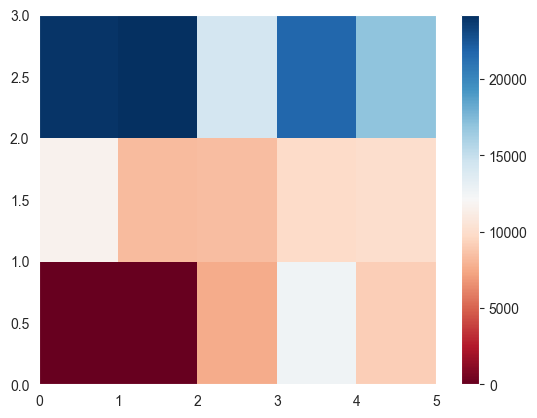

In [35]:
plt.pcolor(grouped_pivot, cmap="RdBu")
plt.colorbar()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables <code>drive-wheel</code> and <code>body-style</code> on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to <code>drive-wheel</code> and <code>body-style</code>.</p>
<p>The default labels convey no useful information to us. Let's change that:</p>

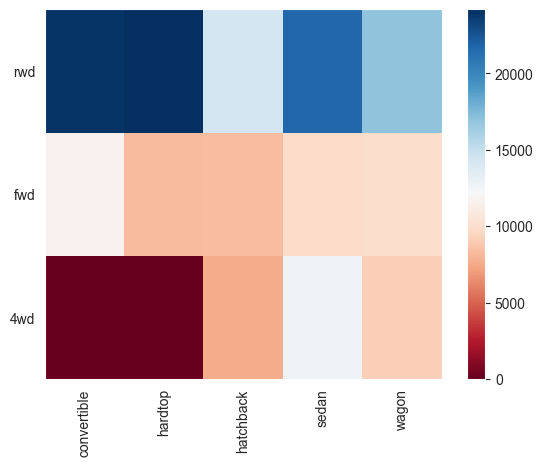

In [36]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap="RdBu")

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate labels if too long
plt.xticks(rotation=90)
fig.colorbar(im)

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>
<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".</p>
<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>

## 5. Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>
<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>
<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

### Pearson Correlation

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>
<p>Pearson Correlation is the default method of the function <code>corr()</code>. Like before, we can calculate the Pearson Correlation of the of the <code>int64</code> or <code>float64</code> variables.</p>

<p>Sometimes we would like to know the significance of the correlation estimate.</p>

### P-value

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>
<p>By convention, when the p-value is:</p>
<ul>
    <li><b>&lt;0.001:</b> We say there is strong evidence that the correlation is significant.</li>
    <li><b>&lt;0.05:</b> There is moderate evidence that the correlation is significant.</li>
    <li><b>&lt;0.1:</b> There is weak evidence that the correlation is significant.</li>
    <li><b>&gt;0.1:</b> There is no evidence that the correlation is significant.</li>
</ul>

### Wheel-Base vs. Price

<p>Let's calculate the Pearson Correlation Coefficient and P-value of <code>wheel-base</code> and <code>price</code>.</p>

In [37]:
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is 0.584641822265508 with a P-value of 8.076488270732847e-20.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>wheel-base</code> and <code>price</code> is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>

### Horsepower vs. Price

<p>Let's calculate the Pearson Correlation Coefficient and P-value of <code>horsepower</code> and <code>price</code>.</p>

In [38]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is 0.8095745670036562 with a P-value of 6.369057428259638e-48.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>horsepower</code> and <code>price</code> is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>

### Length vs. Price

<p>Let's calculate the Pearson Correlation Coefficient and P-value of <code>length</code> and <code>price</code>.</p>

In [39]:
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is 0.6906283804483639 with a P-value of 8.016477466159293e-30.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>length</code> and <code>price</code> is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

### Width vs. Price

<p>Let's calculate the Pearson Correlation Coefficient and P-value of <code>width</code> and <code>price</code>.</p>

In [40]:
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is 0.7512653440522675 with a P-value of 9.200335510480586e-38.


<p>Since the p-value is &lt; 0.001, the correlation between <code>width</code> and <code>price</code> is statistically significant, and the linear relationship is quite strong (~0.751).</p>

### Curb-Weight vs. Price

<p>Let's calculate the Pearson Correlation Coefficient and P-value of <code>curb-weight</code> and <code>price</code>.</p>

In [41]:
pearson_coef, p_value = stats.pearsonr(df["curb-weight"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is 0.8344145257702844 with a P-value of 2.189577238893924e-53.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>curb-weight</code> and <code>price</code> is statistically significant, and the linear relationship is quite strong (~0.834).</p>

### Engine-Size vs. Price

<p>Let's calculate the Pearson Correlation Coefficient and P-value of <code>engine-size</code> and <code>price</code>.</p>

In [42]:
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is 0.8723351674455184 with a P-value of 9.26549162219869e-64.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>engine-size</code> and <code>price</code> is statistically significant, and the linear relationship is very strong (~0.872).</p>

### Bore vs. Price

<p>Let's calculate the Pearson Correlation Coefficient and P-value of <code>bore</code> and <code>price</code>.</p>

In [43]:
pearson_coef, p_value = stats.pearsonr(df["bore"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is 0.5431553832626603 with a P-value of 8.049189483935274e-17.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>bore</code> and <code>price</code> is statistically significant, but the linear relationship is only moderate (~0.521).</p>

<p>We can relate the process for each <code>city-mpg</code> and <code>highway-mpg</code>.</p>

### City-mpg vs. Price

In [44]:
pearson_coef, p_value = stats.pearsonr(df["city-mpg"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is -0.686571006784468 with a P-value of 2.3211320655675065e-29.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>city-mpg</code> and <code>price</code> is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>

### Highway-mpg vs. Price

In [45]:
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"], df["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}.")

The Pearson Correlation Coefficient is -0.7046922650589531 with a P-value of 1.749547114447559e-31.


#### Conclusion

<p>Since the p-value is &lt; 0.001, the correlation between <code>highway-mpg</code> and <code>price</code> is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.</p>

### Conclusion: Important Variables

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>
<p>Continuous numerical variables:</p>
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
<p>Categorical variables:</p>
<ul>
    <li>Drive-wheels</li>
</ul>
<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

****
This is the end of the file.
****